# Project 5
### Brenden Latham
### CPSMA 4413
### Dr. Jacob

In this report we will be examining interpolation with linear splines. We will first refresh on direct interpolation, then see how this compares to the use of splines

In [138]:
import math
import numpy as np
import matplotlib.pyplot as plt

We will use Guassian-Jordan elimination to get our coefficients. We will be examining the exponential function.

In [139]:
def Gauss_elim(A, b):
  augmented = np.concatenate((A, b), axis=1, dtype=float)
  i = 0
  j = i-1
  #forward
  while i < len(b):
    for j in range(i+1, len(b)):
      factor = augmented[j][i]/augmented[i][i]
      augmented[j] = augmented[j] - (factor*augmented[i])
      print(augmented,"\n")
    i = i+1
  #cleaning
  for k in range(len(b)-1, -1, -1):
    augmented[k] = augmented[k]/augmented[k][k]
    print(augmented,"\n")
  #backward
  for k in range(len(b)-2, -1, -1):
    for l in range(k+1, len(b)):
      factor = augmented[k][l]
      augmented[k] = augmented[k]-(factor*augmented[l])
      print(augmented,"\n")

  return(augmented[:, -1])

In [140]:
mat = np.array([[1,1,1,1,1],[1,2,4,8,16],[1,3,9,27,81],[1,4,16,64,256],[1,5,25,125,625]])
sol = np.array([[math.exp(1)],[math.exp(2)],[math.exp(3)],[math.exp(4)],[math.exp(5)]])

In [141]:
solution = Gauss_elim(mat,sol)

[[  1.           1.           1.           1.           1.
    2.71828183]
 [  0.           1.           3.           7.          15.
    4.67077427]
 [  1.           3.           9.          27.          81.
   20.08553692]
 [  1.           4.          16.          64.         256.
   54.59815003]
 [  1.           5.          25.         125.         625.
  148.4131591 ]] 

[[  1.           1.           1.           1.           1.
    2.71828183]
 [  0.           1.           3.           7.          15.
    4.67077427]
 [  0.           2.           8.          26.          80.
   17.36725509]
 [  1.           4.          16.          64.         256.
   54.59815003]
 [  1.           5.          25.         125.         625.
  148.4131591 ]] 

[[  1.           1.           1.           1.           1.
    2.71828183]
 [  0.           1.           3.           7.          15.
    4.67077427]
 [  0.           2.           8.          26.          80.
   17.36725509]
 [  0.           3.

In [142]:
print(solution)

[ 15.97862632 -31.45166743  24.77885788  -7.57486152   0.98732658]


Now that we have our points, we can define our functions.

In [178]:
def f(x):
  res = solution[0] + (solution[1]*x) + (solution[2]*(x**2)) + (solution[3]*(x**3)) + (solution[4]*(x**4))
  return(res)
def g(x):
  return(np.exp(x))

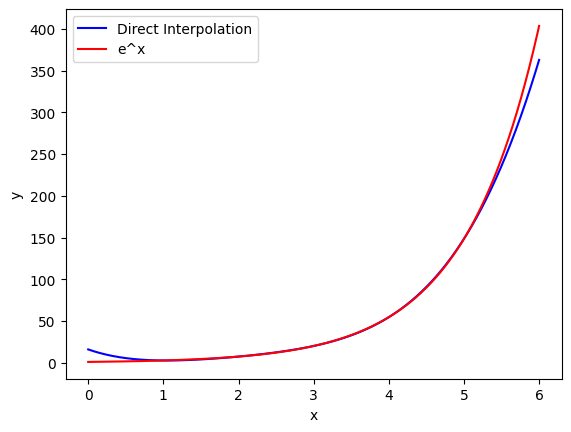

In [179]:
x = np.linspace(0, 6, 1000)
y = f(x)
g_y = g(x)

plt.plot(x, y, label='Direct Interpolation',color='blue')
plt.plot(x, g_y, label='e^x',color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

It seems that direct substitutions is relatively accurate. Let's see how this compares to spline interpolation with five points.

In [183]:
def linear_splines(points):
  y_list = []
  for i in range(len(points)-1):
    x = np.linspace(points[i],points[i+1],100)
    for j in x:
      y = np.exp(points[i]) + (np.exp(points[i+1])-np.exp(points[i]))/(points[i+1]-points[i])*(j-points[i])
      y_list.append(y)
  return(y_list)

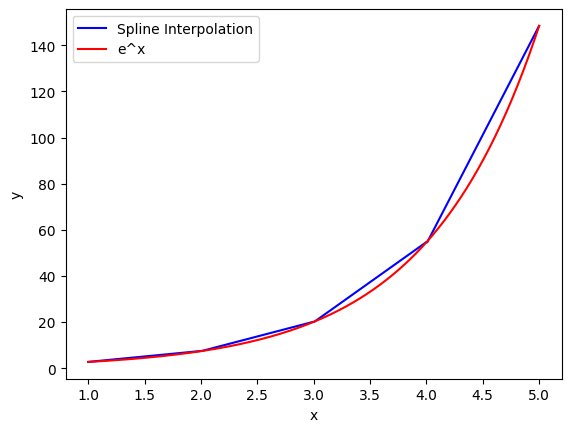

In [184]:
x = np.linspace(1, 5, 400)
points = [1,2,3,4,5]
linear_y = linear_splines(points)
g_y = g(x)

plt.plot(x, linear_y, label='Spline Interpolation',color='blue')
plt.plot(x, g_y, label='e^x',color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

This form of interpolation is also very accurate. It is worth noting that the midpoint between two points is where the error will be at a maximum. Let's now take a look at the same method using twenty points.

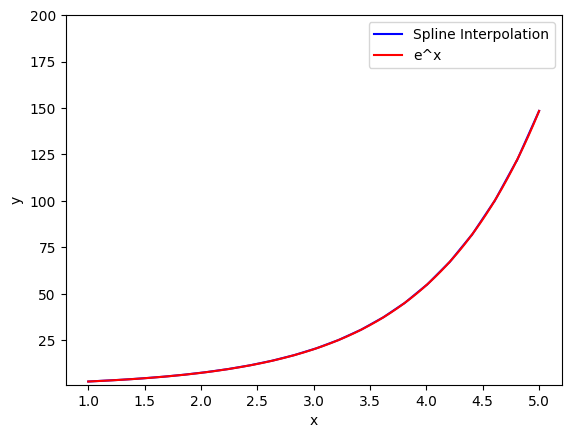

In [185]:
x = np.linspace(1, 5, 2000)
points = np.linspace(1, 5, 21)
linear_y = linear_splines(points)
g_y = g(x)

plt.plot(x, linear_y, label='Spline Interpolation',color='blue')
plt.plot(x, g_y, label='e^x',color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([1,200])
plt.show()

Wow. Twenty points makes a great interpolation with almost no error around where our points lay. Although our interpolation is accurate within our chosen points, a point outside with window would be wildly innacurate. We like interpolation, not extrapolation. Even a point that was within our window, but more of an outlier, would have large error in areas close to it. This is a very accurate form of interpolation given the right circumstances.